In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import matplotlib.pylab as plt
from lifelines import KaplanMeierFitter

In [2]:
durations = pd.read_excel('../data/Rawdata_for_KM.xlsx', index_col=0)
durations.head()

,GROUP,New_DUR,status_KM
study_id,,,
KD001,Nonblack responder,3.0,Normal during FUP
KD004a,Black nonresponder,7.6,Normal during FUP
KD005,Nonblack responder,31.6,Normal during FUP
KD010,Nonblack responder,60.6,Normal during FUP
KD011,Nonblack responder,2.4,Normal during FUP


In [3]:
durations.index.is_unique

True

## Survival analysis

In [4]:
durations['event'] = (durations.status_KM=='Normal during FUP').astype(int)

In [5]:
groups = durations.GROUP.unique().astype(str)
kmf = KaplanMeierFitter()

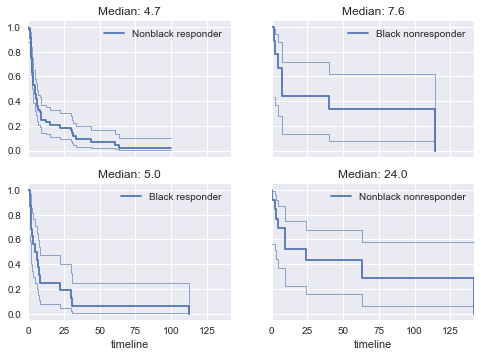

In [6]:
fig,axes = plt.subplots(2, 2, sharex=True, sharey=True)

for ax, group in zip(axes.ravel(), groups):
    times = durations.New_DUR[durations.GROUP==group]
    events = durations.event[durations.GROUP==group]
    kmf.fit(times, event_observed=events, label=group)
    kmf.plot(ax=ax, ci_force_lines=True)
    ax.set_title('Median: {}'.format(kmf.median_))
